<a href="https://colab.research.google.com/github/ankit-genzeon/AI-ML-Bootcamp-Genzeon-2023/blob/master/C2_Manual_Calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset = '/content/drive/MyDrive/Colab Notebooks/Employee_StudyHours.csv'
import pandas as pd
df = pd.read_csv(dataset) #dataframe - terminology  2d

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Hours , df['Scores'] , marker='*')
plt.xlabel("Hours ------>")
plt.ylabel("Estimated Score ------>")
plt.title("Employee Score Probability")
plt.show()

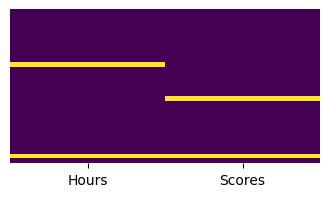

In [ ]:
#seaborn Heatmap
import seaborn as sns

def get_heatmap(df):
  plt.figure(figsize=(4,2))
  sns.heatmap(df.isnull(),yticklabels = False, cbar=False, cmap='viridis')
  return plt.show()

get_heatmap(df)

In [ ]:
#treating missing values
'''
df.dropna()'''
median_v=df.Hours.median()
mean_v=df.Scores.mean()
print(median_v)
print(mean_v)

4.65
51.46666666666667


In [ ]:
import math
df['Hours'] = df.Hours.fillna(median_v)
df['Scores'] = df.Scores.fillna(mean_v)

df

In [ ]:
#method 1
X = df.iloc[:,:-1].values #This uses the iloc indexer to select all rows (:) and all columns except the last column (:-1).
Y = df.iloc[:,-1:].values #Here, df.iloc[:,-1:] selects all rows (:) and the last column (-1:), which is equivalent to selecting the last column only.
X

In [ ]:
#method 2
import numpy as np
X=np.array(df[['Hours']])
Y= np.array(df[['Scores']])
X

In [ ]:
#Step 05 Splitting Data - Train Set & Test Set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

X_train


In [ ]:
import sympy as sym

mi = 1  # representing slope
ci = -1  # intercept
n = 0.01  # learning rate
epochs = 100  # number of iterations to train the model

# Initialize MSE list
MSE = []

# Iterate over epochs
for iter in range(1, epochs + 1):
    print(f'Iteration: {iter}')
    print("++++++++++++++++++++++++++++++++++++++++++++++")

    # Define symbols and equations
    x = sym.Symbol('x')
    y = sym.Symbol('y')
    m = sym.Symbol('m')
    c = sym.Symbol('c')
    E = (0.5) * (y - m * x - c) ** 2  # MSE equation

    total_error = 0

    # Iterate over samples
    for sample in range(len(X_train)):
        xa = X_train[sample, 0]  # Accessing the sample from the NumPy array
        ya = Y_train[sample, 0]
        print(f'Sample: {sample + 1}, x = {xa}, y = {ya}')

        # Compute gradients
        deltaE_m = sym.diff(E, m)
        deltaE_c = sym.diff(E, c)

        # Substitute the current values in the gradients
        deltaE_m = deltaE_m.subs([(m, mi), (c, ci), (x, xa), (y, ya)])
        deltaE_c = deltaE_c.subs([(m, mi), (c, ci), (x, xa), (y, ya)])

        print(f'Gradient obtained wrt deltaE_m: {deltaE_m}')
        print(f'Gradient obtained wrt deltaE_c: {deltaE_c}')

        # Calculate step length
        del_m = -n * deltaE_m
        del_c = -n * deltaE_c

        # Update model parameters
        mi = mi + del_m
        ci = ci + del_c

        # Calculate error for the current sample
        E = E.subs([(m, mi), (c, ci), (x, xa), (y, ya)])
        total_error += E

    # Calculate mean squared error (MSE) for the epoch
    mse = total_error / len(X_train)
    MSE.append(mse)
    print('error')
    print(f'm: {mi}, c: {ci}')
    print("--------------------------------------------")

# Print optimal parameters
print("Optimal parameters:")
print(f'm -> {mi}')
print(f'c -> {ci}')



In [ ]:
MSE

<function matplotlib.pyplot.show(close=None, block=None)>

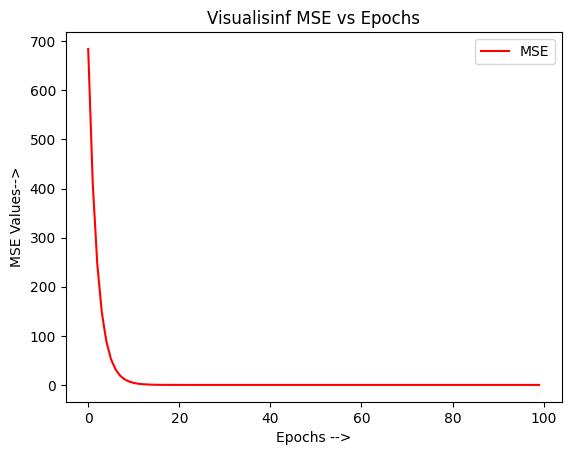

In [ ]:
import matplotlib.pyplot as plt
plt.plot(MSE, label = 'MSE', color='red')
plt.xlabel("Epochs -->")
plt.ylabel("MSE Values-->")
plt.legend()

plt.title("Visualisinf MSE vs Epochs")
plt.show

Performance Evaluation (Manual)
Mean Squared Error (MSE): 202.05371001595404
R-squared (R2) Score: 0.5593342280748609


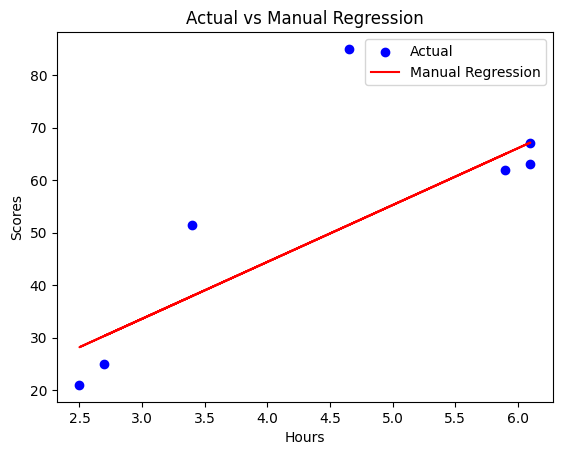

Predicted Score (Manual): [66.0852764573598]


In [ ]:
# Step 11: Make predictions on the test set
y_pred_manual = mi * X_test + ci

# Step 12: Calculate performance metrics
from sklearn.metrics import mean_squared_error

mse_manual = mean_squared_error(Y_test, y_pred_manual)
r2_manual = 1 - (mse_manual / np.var(Y_test))

print("Performance Evaluation (Manual)")
print("Mean Squared Error (MSE):", mse_manual)
print("R-squared (R2) Score:", r2_manual)

# Step 13: Visualize the results
plt.scatter(X_test, Y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_manual, color='red', label='Manual Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Actual vs Manual Regression')
plt.legend()
plt.show()

# Step 14: Predict for custom hours
custom_hours = [[6]]  # Replace with your desired custom hours
custom_pred_manual = np.array(custom_hours) * mi + ci

print("Predicted Score (Manual):", custom_pred_manual[0])

